# Background

Can we use the current IVT model to find the optimal CPPs that optimise the KPIs?

| Metric                                               | Full equation                                                               | Example calculation                                                                                                                   |
| ---------------------------------------------------- | --------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| RNA productivity ($P_{\text{RNA}}$)                  | $P_{\text{RNA}} = \frac{m_{\text{RNA}}}{V\,t}$                              | 50 mg RNA in 10 mL over 2 h ⇒ $P_{\text{RNA}}=\dfrac{0.05\text{ g}}{0.01\text{ L}\times2\text{ h}}=2.5\text{ g L}^{-1}\text{ h}^{-1}$ |
| RNA produced / DNA template ($Y_{\text{RNA/DNA}}$)   | $Y_{\text{RNA/DNA}} = \frac{m_{\text{RNA}}}{m_{\text{DNA}}}$                | 50 mg RNA from 1 mg DNA ⇒ $Y_{\text{RNA/DNA}}=\dfrac{50\text{ mg}}{1\text{ mg}}=50$ g RNA g⁻¹ DNA                                     |
| RNA produced / RNA-polymerase ($Y_{\text{RNA/Pol}}$) | $Y_{\text{RNA/Pol}} = \frac{n_{\text{RNA}}}{n_{\text{Pol}}}$                | 0.2 µmol RNA from 0.005 µmol Pol ⇒ $Y_{\text{RNA/Pol}}=\dfrac{0.2}{0.005}=40$ RNA molecules per polymerase (turnovers)                |
| NTP conversion ($X_{\text{NTP}}$)                    | $X_{\text{NTP}} = \frac{n_{\text{NTP,0}}-n_{\text{NTP}}}{n_{\text{NTP,0}}}$ | 100 µmol initial, 40 µmol remaining ⇒ $X_{\text{NTP}}=\dfrac{100-40}{100}=0.60$ (60 % conversion)                                     |


## Visualising the Response Surface with the given CPPs


Key Enhanced Green Fluorescent Protein not found in the registry.
Returning default values: {'k_app': 5000.0, 'k1': 0.786, 'k2': 60400000.0} for keys: ['Enhanced Green Fluorescent Protein', 'lhs']


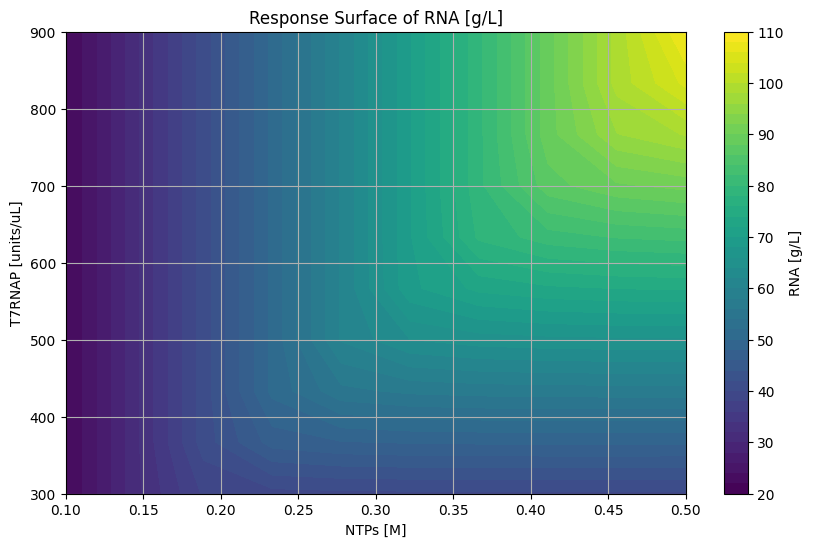

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from r3.models.assimulo.assimulo_model import AssimuloIVTModel
import r3.schema as schema

# Define the ranges for NTP and T7 RNA polymerase concentrations
ntp_range = np.linspace(0.1, 0.5, 10)  # NTP concentration range
t7_range = np.linspace(300, 900.0, 10)  # T7 RNA polymerase concentration range
# Define a constant DNA concentration
dna_concentration = 300.0  # Constant DNA concentration

assimulo_model = AssimuloIVTModel()

# Create a meshgrid for NTP and T7 concentrations
ntp_mesh, t7_mesh = np.meshgrid(ntp_range, t7_range)

# Preallocate the RNA production mesh
rna_mesh = np.zeros_like(ntp_mesh)

# Loop over the meshgrid and simulate for each (ntp, t7) pair
for i in range(ntp_mesh.shape[0]):
    for j in range(ntp_mesh.shape[1]):
        ntp = ntp_mesh[i, j]
        t7 = t7_mesh[i, j]
        _, _, state = assimulo_model.simulate(
            NTP_init=ntp,
            T7tot_init=t7,
            DNA_init=dna_concentration,
            t_final=120,
            get_full_state=True,
        )
        rna_mesh[i, j] = state[schema.IVTReactionSchema.RNA_g_L.value].values[-1]

# Plot the contour plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(ntp_mesh, t7_mesh, rna_mesh, levels=50, cmap="viridis")
plt.colorbar(contour, label=schema.IVTReactionSchema.RNA_g_L.value)
plt.xlabel(schema.IVTReactionSchema.NTP_M.value)
plt.ylabel(schema.IVTReactionSchema.T7RNAP_u_uL.value)
plt.title("Response Surface of " + schema.IVTReactionSchema.RNA_g_L.value)
plt.grid()
plt.show()

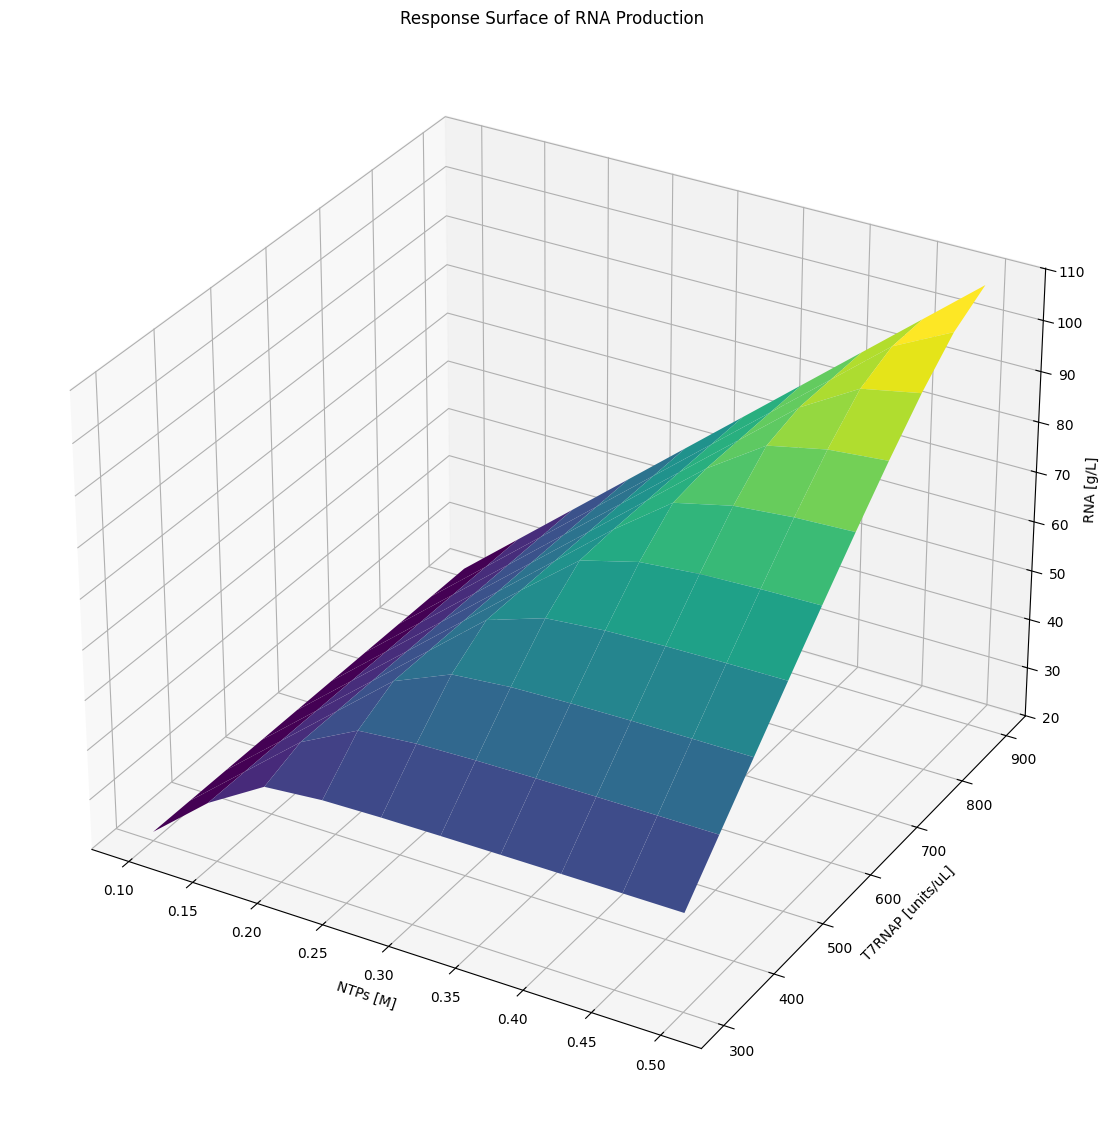

In [38]:
# Plot a 3D surface plot showing the response surface of RNA production (Colour) with respect to NTP (X) DNA (Y) and T7 (Z) concentrations

fig = plt.figure(figsize=(14, 18))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(ntp_mesh, t7_mesh, rna_mesh, cmap="viridis", edgecolor="none")
ax.set_xlabel(schema.IVTReactionSchema.NTP_M.value)
ax.set_ylabel(schema.IVTReactionSchema.T7RNAP_u_uL.value)
ax.set_zlabel(schema.IVTReactionSchema.RNA_g_L.value)
ax.set_title("Response Surface of RNA Production")
plt.show()

## Doing the same calculation but varying all three CPPs


Key Enhanced Green Fluorescent Protein not found in the registry.
Returning default values: {'k_app': 5000.0, 'k1': 0.786, 'k2': 60400000.0} for keys: ['Enhanced Green Fluorescent Protein', 'lhs']


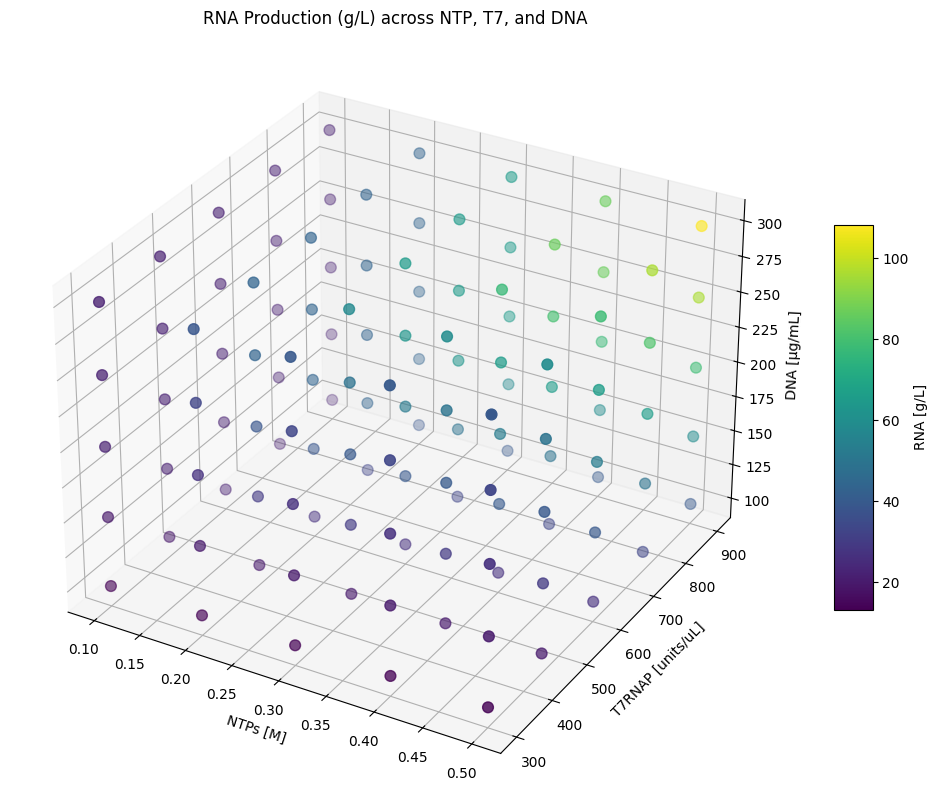

In [5]:
import numpy as np
from r3.models.assimulo.assimulo_model import AssimuloIVTModel
import r3.schema as schema

# Define the ranges for NTP and T7 RNA polymerase concentrations
ntp_range = np.linspace(0.1, 0.5, 5)  # NTP concentration range
t7_range = np.linspace(300, 900.0, 5)  # T7 RNA polymerase concentration range
dna_range = np.linspace(100, 300, 5)  # DNA concentration range

assimulo_model = AssimuloIVTModel()

# Create a meshgrid for NTP, T7, and DNA concentrations
ntp_mesh, t7_mesh, dna_mesh = np.meshgrid(ntp_range, t7_range, dna_range)

# Preallocate the RNA production mesh
rna_mesh = np.zeros_like(ntp_mesh)

# Loop over the meshgrid and simulate for each (ntp, t7) pair
for i in range(ntp_mesh.shape[0]):
    for j in range(ntp_mesh.shape[1]):
        for k in range(ntp_mesh.shape[2]):
            ntp = ntp_mesh[i, j, k]
            t7 = t7_mesh[i, j, k]
            dna = dna_mesh[i, j, k]
            _, _, state = assimulo_model.simulate(
                NTP_init=ntp,
                T7tot_init=t7,
                DNA_init=dna,
                t_final=120,
                get_full_state=True,
            )
            rna_mesh[i, j, k] = state[schema.IVTReactionSchema.RNA_g_L.value].values[-1]

# Interactive 3D scatter plot using plotly
import plotly.graph_objs as go

scatter = go.Scatter3d(
    x=ntp_mesh.flatten(),
    y=t7_mesh.flatten(),
    z=dna_mesh.flatten(),
    mode="markers",
    marker=dict(
        size=rna_mesh.flatten() * 0.2,  # Adjust size scaling as needed
        color=rna_mesh.flatten(),
        colorscale="Viridis",
        colorbar=dict(title=schema.IVTReactionSchema.RNA_g_L.value),
        opacity=0.8,
    ),
    text=[f"RNA: {rna:.2f} g/L" for rna in rna_mesh.flatten()],
)

layout = go.Layout(
    scene=dict(
        xaxis_title=schema.IVTReactionSchema.NTP_M.value,
        yaxis_title=schema.IVTReactionSchema.T7RNAP_u_uL.value,
        zaxis_title=schema.IVTReactionSchema.DNA_ug_mL.value,
    ),
    title="Interactive Response Surface of RNA Production with Varying CPPs",
    margin=dict(l=0, r=0, b=0, t=40),
    height=800,
)

fig_plotly = go.Figure(data=[scatter], layout=layout)
fig_plotly.show()

# Also add a non interactive 3D surface plot using matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection="3d")

# Flatten the meshgrids for scatter plot
x = ntp_mesh.flatten()
y = t7_mesh.flatten()
z = dna_mesh.flatten()
c = rna_mesh.flatten()

sc = ax.scatter(x, y, z, c=c, cmap="viridis", s=60)
ax.set_xlabel(schema.IVTReactionSchema.NTP_M.value)
ax.set_ylabel(schema.IVTReactionSchema.T7RNAP_u_uL.value)
ax.set_zlabel(schema.IVTReactionSchema.DNA_ug_mL.value)
ax.set_title("RNA Production (g/L) across NTP, T7, and DNA")
fig.colorbar(
    sc, ax=ax, shrink=0.5, aspect=10, label=schema.IVTReactionSchema.RNA_g_L.value
)
plt.show()

## Calculating KPIs for the eGFP LHS first experiment

The initial conditions were taken from the eGFP LHS first experiment.


In [40]:
import r3.adapters as adapters

# ==================#
#                   #
#   DEFINE KPIS     #
#                   #
# ==================#


def rna_productivity(
    rna_g_L_produced: float,
    reaction_volume: float,
    reaction_time: float,
    verbose: bool = False,
):
    result = rna_g_L_produced / (reaction_volume * reaction_time)
    if verbose:
        print(
            f"RNA Productivity {result} [g/L*h]",
        )
    return result


def ntp_conversion(
    ntp_initial: float,
    ntp_final: float,
    verbose: bool = False,
):
    result = (ntp_initial - ntp_final) / ntp_initial
    if verbose:
        print(
            f"NTP Conversion {result * 100} [%]",
        )
    return result


def rna_prod_per_t7_rnap(
    t7_rnap_initial: float,
    rna_produced: float,
    verbose: bool = False,
):
    result = rna_produced / t7_rnap_initial
    if verbose:
        print(
            f"RNA per T7 RNAP {result} [M/M]",
        )
    return result


def rna_prod_per_dna(
    dna_initial: float,
    rna_produced: float,
    verbose: bool = False,
):
    result = rna_produced / dna_initial
    if verbose:
        print(
            f"RNA per DNA {result} [M/M]",
        )
    return result


# =================================#
#                                  #
#   LOAD EXPERIMENTAL CONDITIONS   #
#                                  #
# =================================#

X_columns = [
    schema.IVTReactionSchema.NTP_M.value,
    schema.IVTReactionSchema.DNA_ug_mL.value,
    schema.IVTReactionSchema.T7RNAP_u_uL.value,
    schema.IVTReactionSchema.TIME_min.value,
]
y_columns = [schema.IVTReactionSchema.RNA_g_L.value]
experimental_conditions, response = adapters.DataPipelineAdapter(
    "egfp_lhs", verbose=False
).get(
    X_columns=X_columns,
    y_columns=y_columns,
)
final_time = experimental_conditions[schema.IVTReactionSchema.TIME_min.value].values[-1]


assimulo_model = AssimuloIVTModel(
    template=schema.DNATemplates.eGFP, experiment_type=schema.ExperimentType.LHS
)

starting_ntp = experimental_conditions[schema.IVTReactionSchema.NTP_M.value].iloc[0]
starting_dna = experimental_conditions[schema.IVTReactionSchema.DNA_ug_mL.value].iloc[0]
starting_t7_rnap = experimental_conditions[
    schema.IVTReactionSchema.T7RNAP_u_uL.value
].iloc[0]

t, y, ivt_state = assimulo_model.simulate(
    NTP_init=starting_ntp,
    DNA_init=starting_dna,
    T7tot_init=starting_t7_rnap,
    t_final=final_time,
    get_full_state=True,
)


print(ivt_state)
productivity = rna_productivity(
    rna_g_L_produced=ivt_state[schema.IVTReactionSchema.RNA_g_L.value].values[-1],
    reaction_volume=0.05,
    reaction_time=final_time,
    verbose=True,
)
ntp_conv = ntp_conversion(
    ntp_initial=starting_ntp,
    ntp_final=ivt_state[schema.IVTReactionSchema.NTP_M.value].values[-1],
    verbose=True,
)
rna_per_t7 = rna_prod_per_t7_rnap(
    t7_rnap_initial=starting_t7_rnap,
    rna_produced=ivt_state[schema.IVTReactionSchema.RNA_M.value].values[-1],
    verbose=True,
)
rna_per_dna = rna_prod_per_dna(
    dna_initial=starting_dna,
    rna_produced=ivt_state[schema.IVTReactionSchema.RNA_M.value].values[-1],
    verbose=True,
)

Key Enhanced Green Fluorescent Protein not found in the registry.
Returning default values: {'k_app': 5000.0, 'k1': 0.786, 'k2': 60400000.0} for keys: ['Enhanced Green Fluorescent Protein', 'lhs']
    RNA [M]       PPi [M]        Pi [M]  ...  RNA [g/L]        pH  NTPs [M]
0  0.000000  0.000000e+00  1.000000e-12  ...   0.000000  6.700000  0.052044
1  0.000017  5.647831e-09  3.167757e-02  ...   4.118085  6.463568  0.036192

[2 rows x 30 columns]
RNA Productivity 0.6536642992345835 [g/L*h]
NTP Conversion 30.400886081236195 [%]
RNA per T7 RNAP 4.979811604460063e-08 [M/M]
RNA per DNA 6.307761365649413e-07 [M/M]


## Calculating the Process Conditions to optimise the KPIs

**Objective Function (in terms of scaled KPIs and weights):**

$$
\underset{\mathbf{x}}{\operatorname{argmin}} \; \left[ - \left( w_{\text{prod}} \cdot P_{\text{RNA,scaled}}(\mathbf{x}) + w_{\text{ntp}} \cdot X_{\text{NTP,scaled}}(\mathbf{x}) + w_{\text{t7}} \cdot Y_{\text{RNA/Pol,scaled}}(\mathbf{x}) + w_{\text{dna}} \cdot Y_{\text{RNA/DNA,scaled}}(\mathbf{x}) \right) \right]
$$

where

- $\mathbf{x} = [\text{NTP}_{\text{init}}, \text{DNA}_{\text{init}}, \text{T7RNAP}_{\text{init}}]$
- $P_{\text{RNA,scaled}}$ = scaled RNA productivity
- $X_{\text{NTP,scaled}}$ = scaled NTP conversion
- $Y_{\text{RNA/Pol,scaled}}$ = scaled RNA per polymerase
- $Y_{\text{RNA/DNA,scaled}}$ = scaled RNA per DNA
- $w_{\text{prod}}, w_{\text{ntp}}, w_{\text{t7}}, w_{\text{dna}}$ = weights

---

**Why minimize the negative?**

Maximizing a function $f(x)$ is equivalent to minimizing its negative $-f(x)$:

$$
\max_x f(x) \equiv \min_x [-f(x)]
$$

This is computationally easier because most optimization libraries (like
`scipy.optimize.minimize`) are designed to find minima, not maxima. By negating the
objective, you can use these standard tools to perform maximization.

---

**Note on scaling:**

Scaling was done using the range of the KPIs bounds Each component of the objective
function is weighted by a factor of 1.0


In [41]:
# setup optimisation programme for optimising all the KPIs.

import scipy.optimize as opt


# Define the objective function to minimize
def objective_function(x):
    # Unpack the decision variables
    ntp_initial, dna_initial, t7_rnap_initial = x

    # Simulate the model with the given parameters
    t, y, ivt_state = assimulo_model.simulate(
        NTP_init=ntp_initial,
        DNA_init=dna_initial,
        T7tot_init=t7_rnap_initial,
        t_final=final_time,
        get_full_state=True,
    )

    # Calculate KPIs
    productivity = rna_productivity(
        rna_g_L_produced=ivt_state[schema.IVTReactionSchema.RNA_g_L.value].values[-1],
        reaction_volume=0.05,
        reaction_time=final_time,
    )
    ntp_conv = ntp_conversion(
        ntp_initial=ntp_initial,
        ntp_final=ivt_state[schema.IVTReactionSchema.NTP_M.value].values[-1],
    )
    rna_per_t7 = rna_prod_per_t7_rnap(
        t7_rnap_initial=t7_rnap_initial,
        rna_produced=ivt_state[schema.IVTReactionSchema.RNA_M.value].values[-1],
    )
    rna_per_dna = rna_prod_per_dna(
        dna_initial=dna_initial,
        rna_produced=ivt_state[schema.IVTReactionSchema.RNA_M.value].values[-1],
    )

    # Scale KPIs using the bounds (max - min for each variable)
    dna_range = bounds[1][1] - bounds[1][0]  # DNA [µg/mL]
    t7_rnap_range = bounds[2][1] - bounds[2][0]  # T7RNAP [units/uL]

    # Use ranges to scale KPIs (choose representative max values for KPIs)
    productivity_scaled = productivity / 10.0  # assuming max ~10 g/L/h
    ntp_conv_scaled = ntp_conv / 1.0  # conversion is fraction, max ~1
    rna_per_t7_scaled = rna_per_t7 / (t7_rnap_range)  # scale by max possible
    rna_per_dna_scaled = rna_per_dna / (dna_range)  # scale by max possible

    # Optionally, add weights
    w_prod, w_ntp, w_t7, w_dna = 1.0, 1.0, 1.0, 1.0

    # Objective function: minimize negative weighted sum of scaled KPIs
    return -(
        w_prod * productivity_scaled
        + w_ntp * ntp_conv_scaled
        + w_t7 * rna_per_t7_scaled
        + w_dna * rna_per_dna_scaled
    )


# Define the bounds for the decision variables
bounds = [
    (0.0001, 0.5),  # NTP initial concentration in M
    (0.1, 300.0),  # DNA initial concentration in ug/mL
    (0.1, 900.0),  # T7 RNAP initial concentration in u/uL
]
# Initial guess for the decision variables
initial_guess = [
    starting_ntp,  # NTP initial concentration
    starting_dna,  # DNA initial concentration
    starting_t7_rnap,  # T7 RNAP initial concentration
]
# Perform the optimization
result = opt.minimize(
    objective_function,
    initial_guess,
    bounds=bounds,
    method="L-BFGS-B",
)

# Print the optimization results
if result.success:
    optimized_ntp, optimized_dna, optimized_t7_rnap = result.x
    print("Optimization successful!")
    print(f"Optimized NTP initial concentration: {optimized_ntp:.2f} mM")
    print(f"Optimized DNA initial concentration: {optimized_dna:.2f} ug/mL")
    print(f"Optimized T7 RNAP initial concentration: {optimized_t7_rnap:.2f} u/uL")

    # Re-run the simulation with optimized parameters
    t, y, full_state = assimulo_model.simulate(
        NTP_init=optimized_ntp,
        DNA_init=optimized_dna,
        T7tot_init=optimized_t7_rnap,
        t_final=final_time,
        get_full_state=True,
    )

    print(full_state)

    # Calculate KPIs with optimized parameters
    optimized_productivity = rna_productivity(
        rna_g_L_produced=full_state[schema.IVTReactionSchema.RNA_g_L.value].values[-1],
        reaction_volume=0.05,
        reaction_time=final_time,
        verbose=True,
    )
    optimized_ntp_conv = ntp_conversion(
        ntp_initial=optimized_ntp,
        ntp_final=full_state[schema.IVTReactionSchema.NTP_M.value].values[-1],
        verbose=True,
    )
    optimized_rna_per_t7 = rna_prod_per_t7_rnap(
        t7_rnap_initial=optimized_t7_rnap,
        rna_produced=full_state[schema.IVTReactionSchema.RNA_M.value].values[-1],
        verbose=True,
    )
    optimized_rna_per_dna = rna_prod_per_dna(
        dna_initial=optimized_dna,
        rna_produced=full_state[schema.IVTReactionSchema.RNA_M.value].values[-1],
        verbose=True,
    )
else:
    print("Optimization failed:", result.message)

Optimization successful!
Optimized NTP initial concentration: 0.02 mM
Optimized DNA initial concentration: 27.01 ug/mL
Optimized T7 RNAP initial concentration: 342.00 u/uL
    RNA [M]       PPi [M]        Pi [M]  ...  RNA [g/L]        pH  NTPs [M]
0  0.000000  0.000000e+00  1.000000e-12  ...   0.000000  6.700000  0.017387
1  0.000016  3.793560e-10  2.895407e-02  ...   3.764029  6.486867  0.002898

[2 rows x 30 columns]
RNA Productivity 0.5974649023545696 [g/L*h]
NTP Conversion 83.31891279776804 [%]
RNA per T7 RNAP 4.551658060785698e-08 [M/M]
RNA per DNA 5.763493991487943e-07 [M/M]


## The Impact of Different Weights on the Result


In [42]:
# Define the objective function to minimize
def objective_function(x):
    # Unpack the decision variables
    ntp_initial, dna_initial, t7_rnap_initial = x

    # Simulate the model with the given parameters
    t, y, ivt_state = assimulo_model.simulate(
        NTP_init=ntp_initial,
        DNA_init=dna_initial,
        T7tot_init=t7_rnap_initial,
        t_final=final_time,
        get_full_state=True,
    )

    # Calculate KPIs
    productivity = rna_productivity(
        rna_g_L_produced=ivt_state[schema.IVTReactionSchema.RNA_g_L.value].values[-1],
        reaction_volume=0.05,
        reaction_time=final_time,
    )
    ntp_conv = ntp_conversion(
        ntp_initial=ntp_initial,
        ntp_final=ivt_state[schema.IVTReactionSchema.NTP_M.value].values[-1],
    )
    rna_per_t7 = rna_prod_per_t7_rnap(
        t7_rnap_initial=t7_rnap_initial,
        rna_produced=ivt_state[schema.IVTReactionSchema.RNA_M.value].values[-1],
    )
    rna_per_dna = rna_prod_per_dna(
        dna_initial=dna_initial,
        rna_produced=ivt_state[schema.IVTReactionSchema.RNA_M.value].values[-1],
    )

    # Scale KPIs using the bounds (max - min for each variable)
    dna_range = bounds[1][1] - bounds[1][0]  # DNA [µg/mL]
    t7_rnap_range = bounds[2][1] - bounds[2][0]  # T7RNAP [units/uL]

    # Use ranges to scale KPIs (choose representative max values for KPIs)
    productivity_scaled = productivity / 10.0  # assuming max ~10 g/L/h
    ntp_conv_scaled = ntp_conv / 1.0  # conversion is fraction, max ~1
    rna_per_t7_scaled = rna_per_t7 / (t7_rnap_range)  # scale by max possible
    rna_per_dna_scaled = rna_per_dna / (dna_range)  # scale by max possible

    # Optionally, add weights
    w_prod, w_ntp, w_t7, w_dna = 2.0, 0.2, 1.0, 1.5

    # Objective function: minimize negative weighted sum of scaled KPIs
    return -(
        w_prod * productivity_scaled
        + w_ntp * ntp_conv_scaled
        + w_t7 * rna_per_t7_scaled
        + w_dna * rna_per_dna_scaled
    )


# Define the bounds for the decision variables
bounds = [
    (0.0001, 0.5),  # NTP initial concentration in M
    (0.1, 300.0),  # DNA initial concentration in ug/mL
    (0.1, 900.0),  # T7 RNAP initial concentration in u/uL
]
# Initial guess for the decision variables
initial_guess = [
    starting_ntp,  # NTP initial concentration
    starting_dna,  # DNA initial concentration
    starting_t7_rnap,  # T7 RNAP initial concentration
]
# Perform the optimization
result = opt.minimize(
    objective_function,
    initial_guess,
    bounds=bounds,
    method="L-BFGS-B",
)

# Print the optimization results
if result.success:
    optimized_ntp, optimized_dna, optimized_t7_rnap = result.x
    print("Optimization successful!")
    print(f"Optimized NTP initial concentration: {optimized_ntp:.2f} mM")
    print(f"Optimized DNA initial concentration: {optimized_dna:.2f} ug/mL")
    print(f"Optimized T7 RNAP initial concentration: {optimized_t7_rnap:.2f} u/uL")

    # Re-run the simulation with optimized parameters
    t, y, full_state = assimulo_model.simulate(
        NTP_init=optimized_ntp,
        DNA_init=optimized_dna,
        T7tot_init=optimized_t7_rnap,
        t_final=final_time,
        get_full_state=True,
    )

    print(full_state)

    # Calculate KPIs with optimized parameters
    optimized_productivity = rna_productivity(
        rna_g_L_produced=full_state[schema.IVTReactionSchema.RNA_g_L.value].values[-1],
        reaction_volume=0.05,
        reaction_time=final_time,
        verbose=True,
    )
    optimized_ntp_conv = ntp_conversion(
        ntp_initial=optimized_ntp,
        ntp_final=full_state[schema.IVTReactionSchema.NTP_M.value].values[-1],
        verbose=True,
    )
    optimized_rna_per_t7 = rna_prod_per_t7_rnap(
        t7_rnap_initial=optimized_t7_rnap,
        rna_produced=full_state[schema.IVTReactionSchema.RNA_M.value].values[-1],
        verbose=True,
    )
    optimized_rna_per_dna = rna_prod_per_dna(
        dna_initial=optimized_dna,
        rna_produced=full_state[schema.IVTReactionSchema.RNA_M.value].values[-1],
        verbose=True,
    )
else:
    print("Optimization failed:", result.message)

Optimization successful!
Optimized NTP initial concentration: 0.50 mM
Optimized DNA initial concentration: 300.00 ug/mL
Optimized T7 RNAP initial concentration: 900.00 u/uL
    RNA [M]       PPi [M]        Pi [M]  ...   RNA [g/L]        pH  NTPs [M]
0  0.000000  0.000000e+00  1.000000e-12  ...    0.000000  6.700000  0.500415
1  0.000448 -1.089418e-20  8.333333e-01  ...  108.333332  1.277341  0.083403

[2 rows x 30 columns]
RNA Productivity 17.195767034111704 [g/L*h]
NTP Conversion 83.31936753540387 [%]
RNA per T7 RNAP 4.978096329147309e-07 [M/M]
RNA per DNA 1.4934288987441927e-06 [M/M]
